In [2]:
# Import all libraries we are planning to use.
import pandas as pd 
import numpy as np
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


# Import dataset.
cc_dataframe = pd.read_csv("creditcard.csv")

# See how many rows and columns
print(f"Rows: {cc_dataframe.shape[0]} and Columns: {cc_dataframe.shape[1]}")

Rows: 284807 and Columns: 31


In [3]:
# What are the column labels
cc_dataframe.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
# Analyze first and last 10 values of data to see what we have to work with.
cc_dataframe.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
cc_dataframe.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# All values are continious numbers except class which is discrete.
# Lets look for missing data, larger missing count will be on top
cc_dataframe.isnull().sum().sort_values(ascending = False).head(5)

Time      0
V16       0
Amount    0
V28       0
V27       0
dtype: int64

In [7]:

# No missing data, great!
# Time amount, and class are original values, other values are PCA transformation due to confidentiality.
# First I will explore time, amount, and class because I know what they represent.
cc_dataframe[["Time","Amount","Class"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   Amount  284807 non-null  float64
 2   Class   284807 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 6.5 MB


In [8]:
# Time and amount are floats, class is integer.
cc_dataframe[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [9]:

# Time is incremental starting at 0 and going up to 172792 seconds.
# The class field data is integer represented by 0 as non fraud, and 1 as fraud.
# Only 0.17% of all transactions are fraud, which is heavily unbalanced.
# We can confirm that by looking at the count of each class value
cc_dataframe.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

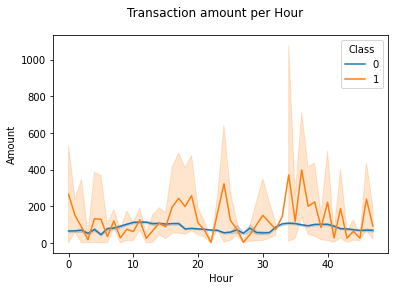

In [10]:
# Create new column to interpret as hour
hourly_dataframe = cc_dataframe.copy()
hourly_dataframe['Hour'] = hourly_dataframe['Time'].apply(lambda x: np.floor(x / 3600))

# Lets look at the amount of transactions for each hour described as fraudulent or not.
sns.lineplot(data=hourly_dataframe, x="Hour", y="Amount", hue="Class")
plt.suptitle("Transaction amount per Hour")
plt.show()

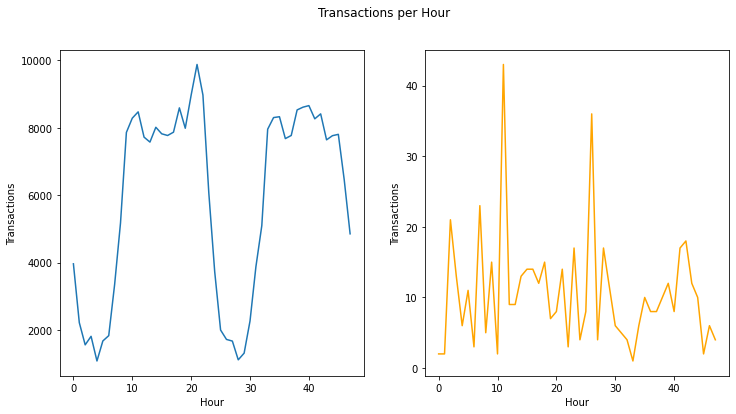

In [11]:
# Lets look at the volume of transactions for each hour described as fraudulent or not.
hourly_agregate = hourly_dataframe.groupby(['Hour','Class'])['Class'].aggregate(['count', 'max']).reset_index()
hourly_dataframe_agregate = pd.DataFrame(hourly_agregate)
hourly_dataframe_agregate.columns = ['Hour', 'Class', 'Transactions', 'Max']
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=hourly_dataframe_agregate.loc[hourly_dataframe_agregate.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=hourly_dataframe_agregate.loc[hourly_dataframe_agregate.Class==1], color="orange")
plt.suptitle("Transactions per Hour")
plt.show()


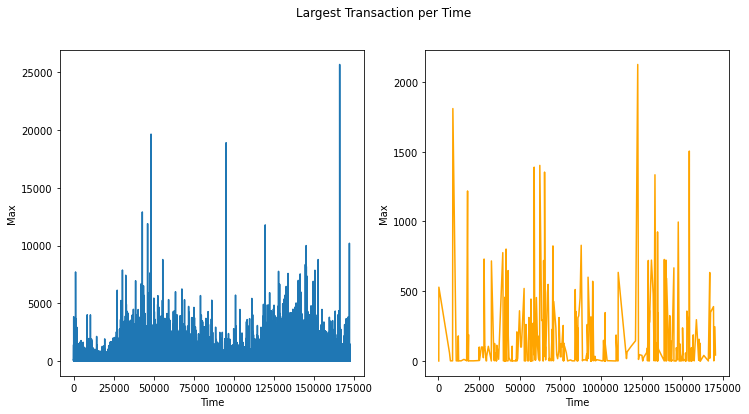

In [12]:
# Lets look at the volume of transactions for each hour described as fraudulent or not.
time_amount_aggregate = cc_dataframe.groupby(['Time','Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
amount_over_time_dataframe = pd.DataFrame(time_amount_aggregate)
amount_over_time_dataframe.columns = ['Time', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="Time", y="Max", data=amount_over_time_dataframe.loc[amount_over_time_dataframe.Class==0])
s = sns.lineplot(ax = ax2, x="Time", y="Max", data=amount_over_time_dataframe.loc[amount_over_time_dataframe.Class==1], color="orange")
plt.suptitle("Largest Transaction per Time")
plt.show()

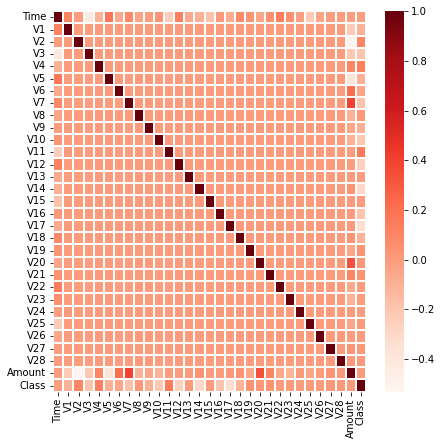

In [13]:
# There is a clear relation between the hour in which transaction occurs
# and the amount for a fraudulent transaction.
# Lets see if there are features which have direct correlation between each other.
plt.figure(figsize = (7,7))
correlation_dataframe = cc_dataframe.corr()
sns.heatmap(correlation_dataframe,xticklabels=correlation_dataframe.columns,yticklabels=correlation_dataframe.columns,linewidths=.1,cmap="Reds")
plt.show()

In [14]:
# Normalize the data to fit between 0-1 floating point values only
for column in ['Time','Amount']:
    cc_dataframe[column] = cc_dataframe[column]  / cc_dataframe[column].abs().max()

In [15]:
# Instead of regular kfold, we are using stratified to make sure distribution of classes is equal for the unbalanced dataset.
five_fold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Next we will create differente variations of data to test
# Separate dataset between valid and invalid transactions
valid_transactions_dataframe = cc_dataframe[cc_dataframe.Class == 0]
invalid_transactions_dataframe = cc_dataframe[cc_dataframe.Class == 1]

# Randomly trim invalid transaction so data is not unbalanced
trimmed_valid_transactions_dataframe = resample(valid_transactions_dataframe, n_samples=(invalid_transactions_dataframe.shape[0]*3), random_state=7)

# Merge the trimmed valid transactions with the invalid transactions
trimmed_cc_dataframe = pd.concat([trimmed_valid_transactions_dataframe,invalid_transactions_dataframe],axis=0)

# Extract our X and y dataframes to run cross validation score with
X_trimmed = trimmed_cc_dataframe.drop(columns='Class')
y_trimmed = trimmed_cc_dataframe.Class

X_original = cc_dataframe.drop(columns='Class')
y_original = cc_dataframe.Class

# Use SMOTE library to oversample the invalid transactions
X_smote, y_smote = SMOTE().fit_resample(X_original, y_original)


# Create data structure to iterate over
X_y_dictionary = {
  'original': [X_original,y_original],
  'trimmed': [X_trimmed,y_trimmed],
  'SMOTE': [X_smote,y_smote]
}


In [16]:
# Random Forest Classifier
RF = RandomForestClassifier()
results = {}
for trial_type, X_y in X_y_dictionary.items():
  scores = cross_val_score(RF, X_y[0], X_y[1], scoring='accuracy', cv=five_fold, n_jobs=-1)
  accuracy = str(round(((sum(scores) / len(scores)) * 100), 2)) + '%'
  results.update({trial_type: accuracy})

results

{'original': '99.96%', 'trimmed': '96.14%', 'SMOTE': '99.99%'}

In [17]:

# Splits data into train and test.
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original, y_original, test_size=0.25, random_state=7, stratify=y_original)
X_trimmed_train, X_trimmed_test, y_trimmed_train, y_trimmed_test = train_test_split(X_trimmed, y_trimmed, test_size=0.25, random_state=7, stratify=y_trimmed)
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=7, stratify=y_smote)

# Merge test and data used to validate prediction
original_test_merged = X_original_test.join(y_original_test)
trimmed_test_merged = X_trimmed_test.join(y_trimmed_test)
smote_test_merged = X_smote_test.join(y_smote_test)

# This test dataset is used run predictions and validate predictions.
test_dataset = {
  'original': {
    'valid': original_test_merged[original_test_merged.Class == 0].drop(columns='Class'),
    'invalid': original_test_merged[original_test_merged.Class == 1].drop(columns='Class'),
    'valid_count': original_test_merged.Class.value_counts()[0],
    'invalid_count': original_test_merged.Class.value_counts()[1]
    },
  'trimmed': {
    'valid': trimmed_test_merged[trimmed_test_merged.Class == 0].drop(columns='Class'),
    'invalid': trimmed_test_merged[trimmed_test_merged.Class == 1].drop(columns='Class'),
    'valid_count': trimmed_test_merged.Class.value_counts()[0],
    'invalid_count': trimmed_test_merged.Class.value_counts()[1]
    },
  'SMOTE': {
    'valid': smote_test_merged[smote_test_merged.Class == 0].drop(columns='Class'),
    'invalid': smote_test_merged[smote_test_merged.Class == 1].drop(columns='Class'),
    'valid_count': smote_test_merged.Class.value_counts()[0],
    'invalid_count': smote_test_merged.Class.value_counts()[1]
  }
}


In [18]:
# Create a structure with the different trials fitted to the classifier.
classifiers = {
    'original': RF.fit(X_original_train,y_original_train),
    'trimmed': RF.fit(X_trimmed_train,y_trimmed_train),
    'SMOTE': RF.fit(X_smote_train, y_smote_train),
 }



In [19]:

# Test the data against the respective testing set.
prediction_results = {}
for classifier_type, classifier_object in classifiers.items():
  # Predict against test dataset consisting of only valid or invalid transactions.
  # Then compare success rate against that particular set.
  valid_predictions = Counter(classifier_object.predict(test_dataset[classifier_type]['valid']))
  invalid_predictions = Counter(classifier_object.predict(test_dataset[classifier_type]['invalid']))
  # Prediction 0 is valid, 1 is invalid. Calculate rate of valid and invalid against the actual count.
  if valid_predictions[0]:
    valid_rate = str(round((valid_predictions[0] / test_dataset[classifier_type]['valid_count']) * 100,2)) + '%'
  else:
    valid_rate = '0%'
    
  if invalid_predictions[1]:
    invalid_rate = str(round((invalid_predictions[1] / test_dataset[classifier_type]['invalid_count']) * 100,2)) + '%'
  else:
    invalid_rate = '0%'
  # Write results
  prediction_results.update({
    classifier_type: {
    'valid_accuracy': valid_rate,
    'invalid_accuracy': invalid_rate
  }})
  

from pprint import pprint
pprint(prediction_results)

{'SMOTE': {'invalid_accuracy': '100.0%', 'valid_accuracy': '99.97%'},
 'original': {'invalid_accuracy': '100.0%', 'valid_accuracy': '99.97%'},
 'trimmed': {'invalid_accuracy': '100.0%', 'valid_accuracy': '100.0%'}}


In [20]:
# Test the data against the respective testing set.
prediction_results = {}

classifier_object = classifiers['trimmed']
test_against = 'original'

valid_predictions = Counter(classifier_object.predict(test_dataset[test_against]['valid']))
invalid_predictions = Counter(classifier_object.predict(test_dataset[test_against]['invalid']))
# Prediction 0 is valid, 1 is invalid. Calculate rate of valid and invalid against the actual count.
if valid_predictions[0]:
  valid_rate = str(round((valid_predictions[0] / test_dataset[test_against]['valid_count']) * 100,2)) + '%'
else:
  valid_rate = '0%'
  
if invalid_predictions[1]:
  invalid_rate = str(round((invalid_predictions[1] / test_dataset[test_against]['invalid_count']) * 100,2)) + '%'
else:
  invalid_rate = '0%'
# Write results
prediction_results.update({
  test_against: {
  'valid_accuracy': valid_rate,
  'invalid_accuracy': invalid_rate
}})
  

from pprint import pprint
pprint(prediction_results)

{'original': {'invalid_accuracy': '100.0%', 'valid_accuracy': '99.97%'}}
